# Import Libraries

In [54]:
# Basic
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import pickle

# Supervised ML 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Importing Datasets

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

# Initial Checks

In [3]:
print('Number of rows Before removing duplicated rows: ', df_train.shape[0])
df_train = df_train.drop_duplicates()

print('Number of rows After removing duplicated rows: ', df_train.shape[0])

Number of rows Before removing duplicated rows:  21000
Number of rows After removing duplicated rows:  21000


There is no presence of duplicated rows.

In [4]:
df_train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [ ]:
df_train.isna().sum()

There are No missing values. But, there is presence of 'Not Available'.

In [5]:
df_train.nunique()

Uniq Id                       21000
Package Name                   2204
Package Type                      5
Destination                     565
Itinerary                       966
Places Covered                  565
Travel Date                     495
Hotel Details                  6060
Start City                        2
Airline                         314
Flight Stops                      3
Meals                             4
Sightseeing Places Covered     1714
Cancellation Rules               10
Per Person Price              17138
dtype: int64

In [6]:
# Lower-casing the column names of the datasets for ease of access

df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

# Confirming the changes
df_train.columns

Index(['uniq id', 'package name', 'package type', 'destination', 'itinerary',
       'places covered', 'travel date', 'hotel details', 'start city',
       'airline', 'flight stops', 'meals', 'sightseeing places covered',
       'cancellation rules', 'per person price'],
      dtype='object')

# Basic Data Exploration

### Variable Distribution Based on the findings from the previous section

In [7]:
quant_col = ['per person price']
cat_col = ['package name','package type','destination','cancellation rules',
          'sightseeing places covered','flight stops', 'meals','places covered', 'travel date', 'hotel details', 'start city',
       'airline']
cols_to_drop = ['uniq id']

## Feature Engineering 

In [8]:
# Replacing long string into readable rules
df_train['cancellation rules'].replace({
    (df_train['cancellation rules'].unique())[0]:0,
    (df_train['cancellation rules'].unique())[1]:1,
    (df_train['cancellation rules'].unique())[2]:2,
    (df_train['cancellation rules'].unique())[3]:3,
    (df_train['cancellation rules'].unique())[4]:4,
    (df_train['cancellation rules'].unique())[5]:5,
    (df_train['cancellation rules'].unique())[6]:6,
    (df_train['cancellation rules'].unique())[7]:7,
    (df_train['cancellation rules'].unique())[8]:8,
    (df_train['cancellation rules'].unique())[9]:9
}, inplace = True)

In [9]:
# Room Classification

df_train['package type'] = pd.Categorical(df_train['package type'],
                                         ['Budget','Standard','Deluxe','Premium', 'Luxury'],
                                          ordered = True)
# Room Prioritization

df_train['room_priority'] = df_train['package type'].cat.codes

# Number of Sightseeing Places Covered

dummy = []

for i in range(len(df_train['sightseeing places covered'])):
    if df_train['sightseeing places covered'][i] == 'Not Available':
        dummy.append(0)
    else:
        dummy.append(len((df_train['sightseeing places covered'].iloc[i]).split('|')))

df_train['n_sightseeing_places'] = dummy

# Determining if the trip returns to the first destination

dummy_1 = []

for i in range(len(df_train['destination'])):
    a = df_train['destination'][i].split('|')
    
    if a[0] == a[-1]:
        dummy_1.append(1)
    else:
        dummy_1.append(0)
        
df_train['return_to_first'] = dummy_1

# Determine if the starting city is the first destination

dummy_2 = []

for i in range(len(df_train['destination'])):
    a = df_train['destination'][i].split('|')
    
    if df_train['start city'][i] == a[0]:
        dummy_2.append(1)
    else:
        dummy_2.append(0)
        
df_train['first_dest'] = dummy_2

# Number of Airline Carriers

dummy_3 = []

for i in range(len(df_train['airline'])):
    if df_train['airline'][i] == 'Not Avaialble':
        dummy_3.append(0)
    else:
        dummy_3.append(len(df_train['airline'][i].split('|')))
        
df_train['n_carriers'] = dummy_3

# Determining the Mean Rating of the Hotels each travel

dummy_4 = []

for i in range(len(df_train['hotel details'])):
    count = []
    for j in range(len(df_train['hotel details'][i].split('|'))):
        if '.' not in (df_train['hotel details'][i].split('|'))[j][-2:]:
            if (df_train['hotel details'][i].split('|'))[j][-3:] == 'One':
                count.append(1.0)
            elif (df_train['hotel details'][i].split('|'))[j][-3:] == 'Two':
                count.append(2.0)
            elif (df_train['hotel details'][i].split('|'))[j][-3:] == 'ree':
                count.append(3.0)
            elif (df_train['hotel details'][i].split('|'))[j][-3:] == 'our':
                count.append(4.0)
            else:
                count.append(5.0)
        else:
            if '.' == (df_train['hotel details'][i].split('|'))[j][-1:]:
                pass
            elif ('.' == (df_train['hotel details'][i].split('|'))[j][-1:]) or (':' == (df_train['hotel details'][i].split('|'))[j][-1:]):
                pass
            elif '.' == (df_train['hotel details'][i].split('|'))[j][-2:]:
                count.append(float((df_train['hotel details'][i].split('|'))[j][-1]))
            else:
                count.append(float((df_train['hotel details'][i].split('|'))[j][-1]))

    dummy_4.append(round(np.mean(count),2))
    
df_train['mean_rating'] = dummy_4

# Determining the total number of Nights in the Package

dummy_4 = []

for i in range(len(df_train['itinerary'])):
    count = []
    a = df_train['itinerary'][i].split('.')
    for j in range(len(a)):
        if a[j][1]=='N':
            pass
        else:
            count.append(int(a[j][1]))
    dummy_4.append(np.sum(count))
    
df_train['total_nights'] = dummy_4

# Extracting the Month from the Date Column

df_train['travel_month'] = pd.DatetimeIndex(pd.to_datetime(df_train['travel date'],dayfirst = True)).month


In [10]:
# Redifing the Previously defined variables

quant_col = ['per person price','mean_rating']

cat_col = ['flight stops', 'meals', 'start city',
           'travel_month', 'total_nights','n_carriers','n_sightseeing_places',
           'room_priority', 'cancellation rules','return_to_first','first_dest',
          ]

cols_to_drop = ['uniq id','airline','package name','package type','destination',
          'sightseeing places covered','places covered', 'travel date', 'hotel details','itinerary' ]

In [11]:
# Redifining the types of the variables

df_train['total_nights'] = df_train['total_nights'].astype('int64')


## Target Variable Distribution

(array([1.0545e+04, 8.7310e+03, 1.3180e+03, 2.8100e+02, 6.9000e+01,
        2.8000e+01, 1.5000e+01, 7.0000e+00, 1.0000e+00, 5.0000e+00]),
 array([   791.  ,  17818.15,  34845.3 ,  51872.45,  68899.6 ,  85926.75,
        102953.9 , 119981.05, 137008.2 , 154035.35, 171062.5 ]),
 <a list of 10 Patch objects>)

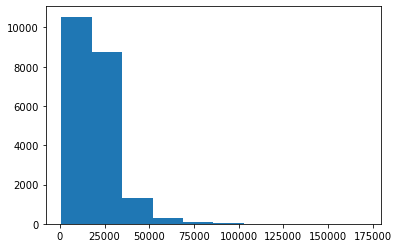

In [12]:
plt.hist(df_train['per person price'])

Presence of Outliers in the Target Variable. To deal with the outliers, the variables would be scaled, to prevent data leak.

# Visual Distribution of the Predictors

## For Categorical Variables

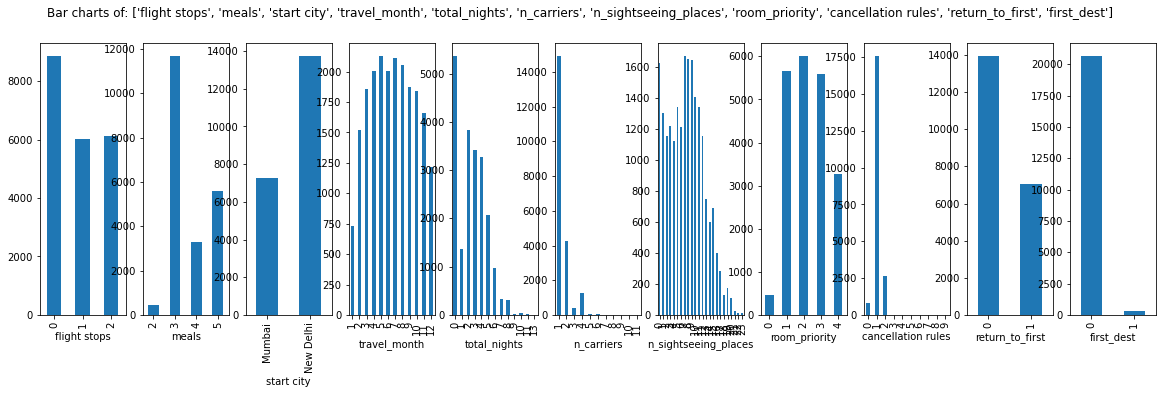

In [13]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(cat_col))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
        
        
# Calling the function
PlotBarCharts(inpData=df_train, colsToPlot=cat_col)

### Bar Chart Interpretation

* Most destinations have direct flights.

* New Delhi is the most preferred starting city.

* 5th and 7th Months are the most preferred.

* Most of the stays are only for the day time.

* The initial impression from the Bar Chart is that there would be few more predictors that would need to be dropped. Statistical tests would serve the basis for the decision.

## For Continuous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251FD9F7E20>,
      dtype=object)

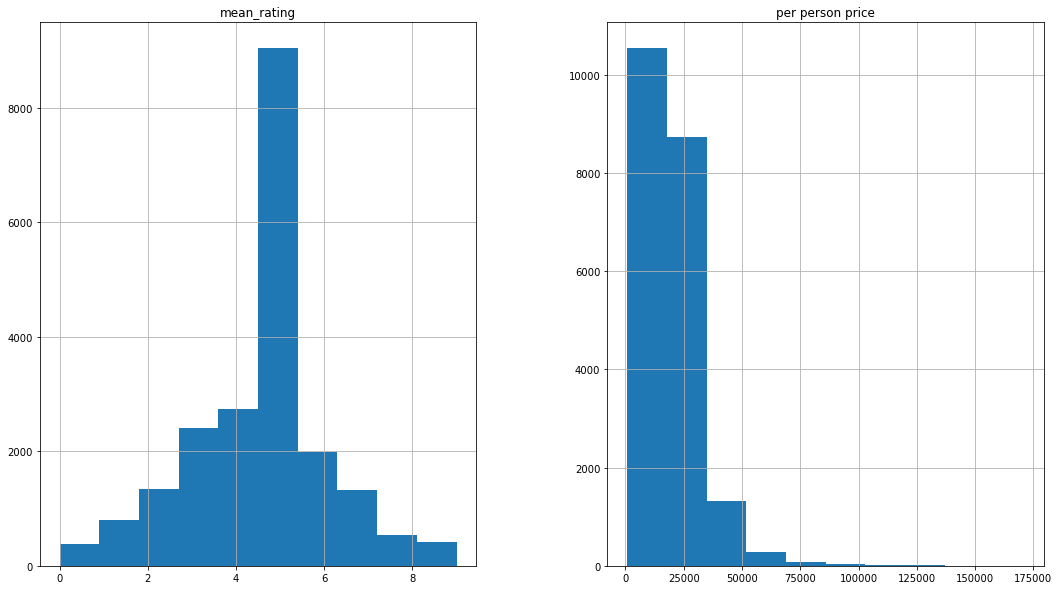

In [14]:
df_train.hist(quant_col, figsize=(18,10))

# Statistical Testing for Feature Selection

## For Continuous Variables

In [15]:
Correlation_Data = df_train[quant_col].corr()
Correlation_Data

,per person price,mean_rating
per person price,1.000000,-0.066011
mean_rating,-0.066011,1.000000


## For Categorical Variables

In [16]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)


FunctionAnova(inpData=df_train, 
              TargetVariable='per person price', 
              CategoricalPredictorList=cat_col)

##### ANOVA Results ##### 

flight stops is correlated with per person price | P-Value: 0.0
meals is correlated with per person price | P-Value: 0.0
start city is correlated with per person price | P-Value: 9.336712031102475e-12
travel_month is NOT correlated with per person price | P-Value: 0.3052800084659279
total_nights is correlated with per person price | P-Value: 0.0
n_carriers is correlated with per person price | P-Value: 0.0
n_sightseeing_places is correlated with per person price | P-Value: 1.527245153843493e-169
room_priority is correlated with per person price | P-Value: 0.0
cancellation rules is correlated with per person price | P-Value: 0.0
return_to_first is correlated with per person price | P-Value: 1.3693426138481862e-85
first_dest is NOT correlated with per person price | P-Value: 0.6676139767107909


['flight stops',
 'meals',
 'start city',
 'total_nights',
 'n_carriers',
 'n_sightseeing_places',
 'room_priority',
 'cancellation rules',
 'return_to_first']

# Data Pre-processing

In [17]:
df_train['start city'].replace({
    'Mumbai': 0,
    'New Delhi':1
},inplace = True)

In [18]:
# Selecting Final Predictors for Model Making

cat_col_sel = ['flight stops','meals','start city','total_nights','n_carriers',
 'n_sightseeing_places','room_priority','cancellation rules','return_to_first']

quant_col_sel = ['mean_rating']

SelectedColumns = ['flight stops','meals','start city','total_nights','n_carriers',
 'n_sightseeing_places','room_priority',
                   'cancellation rules','return_to_first','per person price']

Data4ML = df_train[SelectedColumns]

# Saving the data for reference
Data4ML.to_pickle('Data4ML.pkl')

# Scaling the Test Data in accordance to Train Data

In [57]:
# Replacing long string into readable rules
df_test['cancellation rules'].replace({
    (df_test['cancellation rules'].unique())[0]:0,
    (df_test['cancellation rules'].unique())[1]:1,
    (df_test['cancellation rules'].unique())[2]:2,
    (df_test['cancellation rules'].unique())[3]:3,
    (df_test['cancellation rules'].unique())[4]:4,
    (df_test['cancellation rules'].unique())[5]:5,
    (df_test['cancellation rules'].unique())[6]:6
}, inplace = True)

# Room Classification

df_test['package type'] = pd.Categorical(df_test['package type'],
                                         ['Budget','Standard','Deluxe','Premium', 'Luxury'],
                                          ordered = True)
# Room Prioritization

df_test['room_priority'] = df_test['package type'].cat.codes

# Number of Sightseeing Places Covered

dummy = []

for i in range(len(df_test['sightseeing places covered'])):
    if df_test['sightseeing places covered'][i] == 'Not Available':
        dummy.append(0)
    else:
        dummy.append(len((df_test['sightseeing places covered'].iloc[i]).split('|')))

df_test['n_sightseeing_places'] = dummy

# Determining if the trip returns to the first destination

dummy_1 = []

for i in range(len(df_test['destination'])):
    a = df_test['destination'][i].split('|')
    
    if a[0] == a[-1]:
        dummy_1.append(1)
    else:
        dummy_1.append(0)
        
df_test['return_to_first'] = dummy_1

# Determine if the starting city is the first destination

dummy_2 = []

for i in range(len(df_test['destination'])):
    a = df_test['destination'][i].split('|')
    
    if df_test['start city'][i] == a[0]:
        dummy_2.append(1)
    else:
        dummy_2.append(0)
        
df_test['first_dest'] = dummy_2

# Number of Airline Carriers

dummy_3 = []

for i in range(len(df_test['airline'])):
    if df_test['airline'][i] == 'Not Avaialble':
        dummy_3.append(0)
    else:
        dummy_3.append(len(df_train['airline'][i].split('|')))
        
df_test['n_carriers'] = dummy_3

# Determining the Mean Rating of the Hotels each travel

dummy_4 = []

for i in range(len(df_test['hotel details'])):
    count = []
    for j in range(len(df_test['hotel details'][i].split('|'))):
        if '.' not in (df_test['hotel details'][i].split('|'))[j][-2:]:
            if (df_test['hotel details'][i].split('|'))[j][-3:] == 'One':
                count.append(1.0)
            elif (df_test['hotel details'][i].split('|'))[j][-3:] == 'Two':
                count.append(2.0)
            elif (df_test['hotel details'][i].split('|'))[j][-3:] == 'ree':
                count.append(3.0)
            elif (df_test['hotel details'][i].split('|'))[j][-3:] == 'our':
                count.append(4.0)
            else:
                count.append(5.0)
        else:
            if '.' == (df_test['hotel details'][i].split('|'))[j][-1:]:
                pass
            elif ('.' == (df_test['hotel details'][i].split('|'))[j][-1:]) or (':' == (df_test['hotel details'][i].split('|'))[j][-1:]):
                pass
            elif '.' == (df_test['hotel details'][i].split('|'))[j][-2:]:
                count.append(float((df_test['hotel details'][i].split('|'))[j][-1]))
            else:
                count.append(float((df_test['hotel details'][i].split('|'))[j][-1]))

    dummy_4.append(round(np.mean(count),2))
    
df_test['mean_rating'] = dummy_4

# Determining the total number of Nights in the Package

dummy_4 = []

for i in range(len(df_test['itinerary'])):
    count = []
    a = df_test['itinerary'][i].split('.')
    for j in range(len(a)):
        if a[j][1]=='N':
            pass
        else:
            count.append(int(a[j][1]))
    dummy_4.append(np.sum(count))
    
df_test['total_nights'] = dummy_4

# Extracting the Month from the Date Column

df_test['travel_month'] = pd.DatetimeIndex(pd.to_datetime(df_test['travel date'],dayfirst = True)).month

# Redifining the types of the variables

df_test['total_nights'] = df_test['total_nights'].astype('int64')

df_test['start city'].replace({
    'Mumbai': 0,
    'New Delhi':1
},inplace = True)

# Data Scaling and  Splitting

In [20]:
TargetVariable = 'per person price'
Predictors = ['flight stops','meals','start city','total_nights','n_carriers',
 'n_sightseeing_places','room_priority','cancellation rules','return_to_first']

X = Data4ML[Predictors]
y = Data4ML[TargetVariable]

PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=5)

# Confirming the Changes

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14700, 9)
(14700,)
(6300, 9)
(6300,)


# Model Building

In [21]:
# Determining the Baseline Performance of Different Models

def RegLoop(X_train,y_train,X_test):
    R_list = [LinearRegression,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,
              XGBRegressor,SVR,Ridge,Lasso,KNeighborsRegressor]
    RMSLE_val = {}
    for alg in R_list:
        RegModel=alg()
        Mdl=RegModel.fit(X_train,y_train)
        prediction=Mdl.predict(X_test)
        MSLE = mean_squared_log_error(abs(y_train), abs(RegModel.predict(X_train)))
        RMSLE = np.sqrt(MSLE)
        RMSLE_val.update({alg: round(RMSLE,2)})
        
    return RMSLE_val

In [22]:
RegLoop(X_train,y_train,X_test)

{sklearn.linear_model._base.LinearRegression: 0.4,
 sklearn.tree._classes.DecisionTreeRegressor: 0.29,
 sklearn.ensemble._forest.RandomForestRegressor: 0.29,
 sklearn.ensemble._weight_boosting.AdaBoostRegressor: 0.49,
 xgboost.sklearn.XGBRegressor: 0.32,
 sklearn.svm._classes.SVR: 0.53,
 sklearn.linear_model._ridge.Ridge: 0.4,
 sklearn.linear_model._coordinate_descent.Lasso: 0.39,
 sklearn.neighbors._regression.KNeighborsRegressor: 0.34}

From the above test, **Decision Tree** and **XGBoost** models will be considered for further iterations.

## Decision Tree

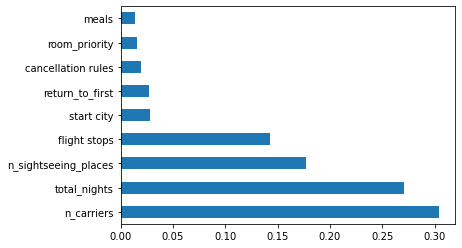

In [33]:
RegModel=DecisionTreeRegressor()
Mdl=RegModel.fit(X_train,y_train)
prediction=Mdl.predict(X_test)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(Mdl.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

From the above graph, the most important predictors are:
* n_carriers
* total_nights
* n_sightseeing_places
* meals

#### Hyper Parameter Tuning

In [36]:
Selected_Pred = ['n_carriers','total_nights','n_sightseeing_places', 'meals']
Target_Var = 'per person price'


parameters = {'criterion':('mse',  'mae', 'friedman_mse','poisson' ), 'max_depth':[75,100,125,150],
              'splitter':('best','random')}

RegModel = DecisionTreeRegressor()
clf = GridSearchCV(RegModel, parameters)
clf.fit(X_train, y_train)
clf.best_params_

C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASHUTOSH DAS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

{'criterion': 'friedman_mse', 'max_depth': 100, 'splitter': 'random'}

In [39]:
# Checking the RMSLE Score by using the Recommended Hyper-parameters

RegModel_dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=100,
                              splitter='best')
Mdl_dt=RegModel.fit(X_train,y_train)
prediction_dt=Mdl.predict(X_test)
MSLE_dt = mean_squared_log_error(abs(y_train), abs(RegModel.predict(X_train)))
RMSLE_dt = np.sqrt(MSLE_dt)

print('RMSLE value is: ', np.round(RMSLE_dt,2))

RMSLE value is:  0.29


In [ ]:
# Predicted Values By the Decision Tree

dt_results = pd.DataFrame(data=X_test, columns = Predictors)

dt_results[TargetVariable]=y_test
dt_results[('Predicted'+TargetVariable)]=np.round(prediction)


## XGBoost

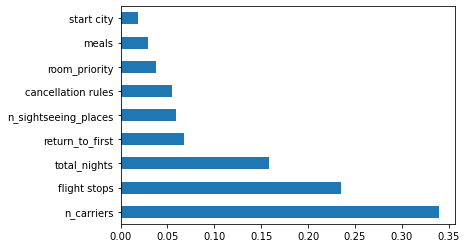

In [26]:
RegModel=XGBRegressor()
Mdl=RegModel.fit(X_train,y_train)
prediction=Mdl.predict(X_test)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(Mdl.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#### Hyper Parameter Tuning

In [40]:
Selected_Pred = ['n_carriers','total_nights','n_sightseeing_places', 'meals']
Target_Var = 'per person price'

parameters = {'booster':('gbtree',  'gblinear', 'dart'),
              'learning_rate':[0.1,0.3,0.5,0.6,0.8]}

RegModel = XGBRegressor()
clf = GridSearchCV(RegModel, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'booster': 'gbtree', 'learning_rate': 0.3}

In [41]:
# Checking the RMSLE Score by using the Recommended Hyper-parameters

RegModel_XGB=XGBRegressor(booster='gbtree',learning_rate=0.3)
Mdl_XGB=RegModel.fit(X_train,y_train)
prediction_XGB=Mdl.predict(X_test)
MSLE_XGB = mean_squared_log_error(abs(y_train), abs(RegModel.predict(X_train)))
RMSLE_XGB = np.sqrt(MSLE_XGB)

print('RMSLE value is: ', np.round(RMSLE,2))

RMSLE value is:  0.29


In [42]:
# Predicted Values By the XGBoost

XGB_results = pd.DataFrame(data=X_test, columns = Predictors)

XGB_results[TargetVariable]=y_test
XGB_results[('Predicted'+TargetVariable)]=np.round(prediction_XGB)

## Cross-validation for the Selected Models

In [51]:
# Defining a custom scorer

def custom_RMSLE(orig,pred):
    MSLE = mean_squared_log_error(abs(orig), abs(pred))
    RMSLE = np.sqrt(MSLE)
    return (np.round(RMSLE,2))

custom_Scoring=make_scorer(custom_RMSLE, greater_is_better=True)

# Cross-validating on Decision Tree

RMSLE_Values=cross_val_score(RegModel_dt, X , y, cv=10, scoring=custom_Scoring)
print('\nRMSLE values for 10-fold Cross Validation:\n',RMSLE_Values)
print('\nFinal Average RMSLE values of the model:', round(RMSLE_Values.mean(),2))

# Cross-validating on XGBoost

RMSLE_Values=cross_val_score(RegModel_XGB, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',RMSLE_Values)
print('\nFinal Average Accuracy of the model:', round(RMSLE_Values.mean(),2))


RMSLE values for 10-fold Cross Validation:
 [0.36 0.34 0.33 0.36 0.33 0.34 0.35 0.36 0.35 0.35]

Final Average RMSLE values of the model: 0.35

Accuracy values for 10-fold Cross Validation:
 [0.34 0.34 0.32 0.35 0.32 0.33 0.34 0.35 0.34 0.34]

Final Average Accuracy of the model: 0.34


# Retraining the Model using 100% of the data

In [55]:
Final_XGB_Model=RegModel.fit(X,y)

# Model Export

with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file location:', os.getcwd())

pickle file location: C:\Users\ASHUTOSH DAS\Documents\Compettitions\Machine Hack\Workation_price_pred


# Generating Predictions

In [63]:
with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
Predictors = ['flight stops','meals','start city','total_nights','n_carriers',
 'n_sightseeing_places','room_priority','cancellation rules','return_to_first']

X_gen = df_test[Predictors]

PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X_gen)
X_gen=PredictorScalerFit.transform(X_gen)

# GenPrice Predictions
Prediction=PredictionModel.predict(X_gen)
PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])

# Exporting the Predictions
PredictionResult.to_csv('workation_submission.csv', index=False)